In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import MDS

In [2]:
REPORTS = Path("../reports")

In [3]:
sim = np.load(REPORTS / "Similarity-Matrix.npy")

In [5]:
sim.shape

(18, 18)

In [6]:
indexes = [
    'BERT-1', 
    'BERT-5',
    'BERT-20', 
    'BERT-5 Lag-1',
    'BERT-5 - BERT-1',
    'BERT-5R', 
    'BERT-20R', 
    'BERT-5 Res-1',
    'BERT-5 Res-2',
    'BERT-5 Res-3',
    'BERT-5R Res-1', 
    'BERT-5R Res-2',
    'BERT-5R Res-3', 
    'BERT-5 Lag-2', 
    'BERT-5 Lag-3',
    'BERT-5R Lag-1',
    'BERT-5R Lag-2',
    'BERT-5R Lag-3',
]

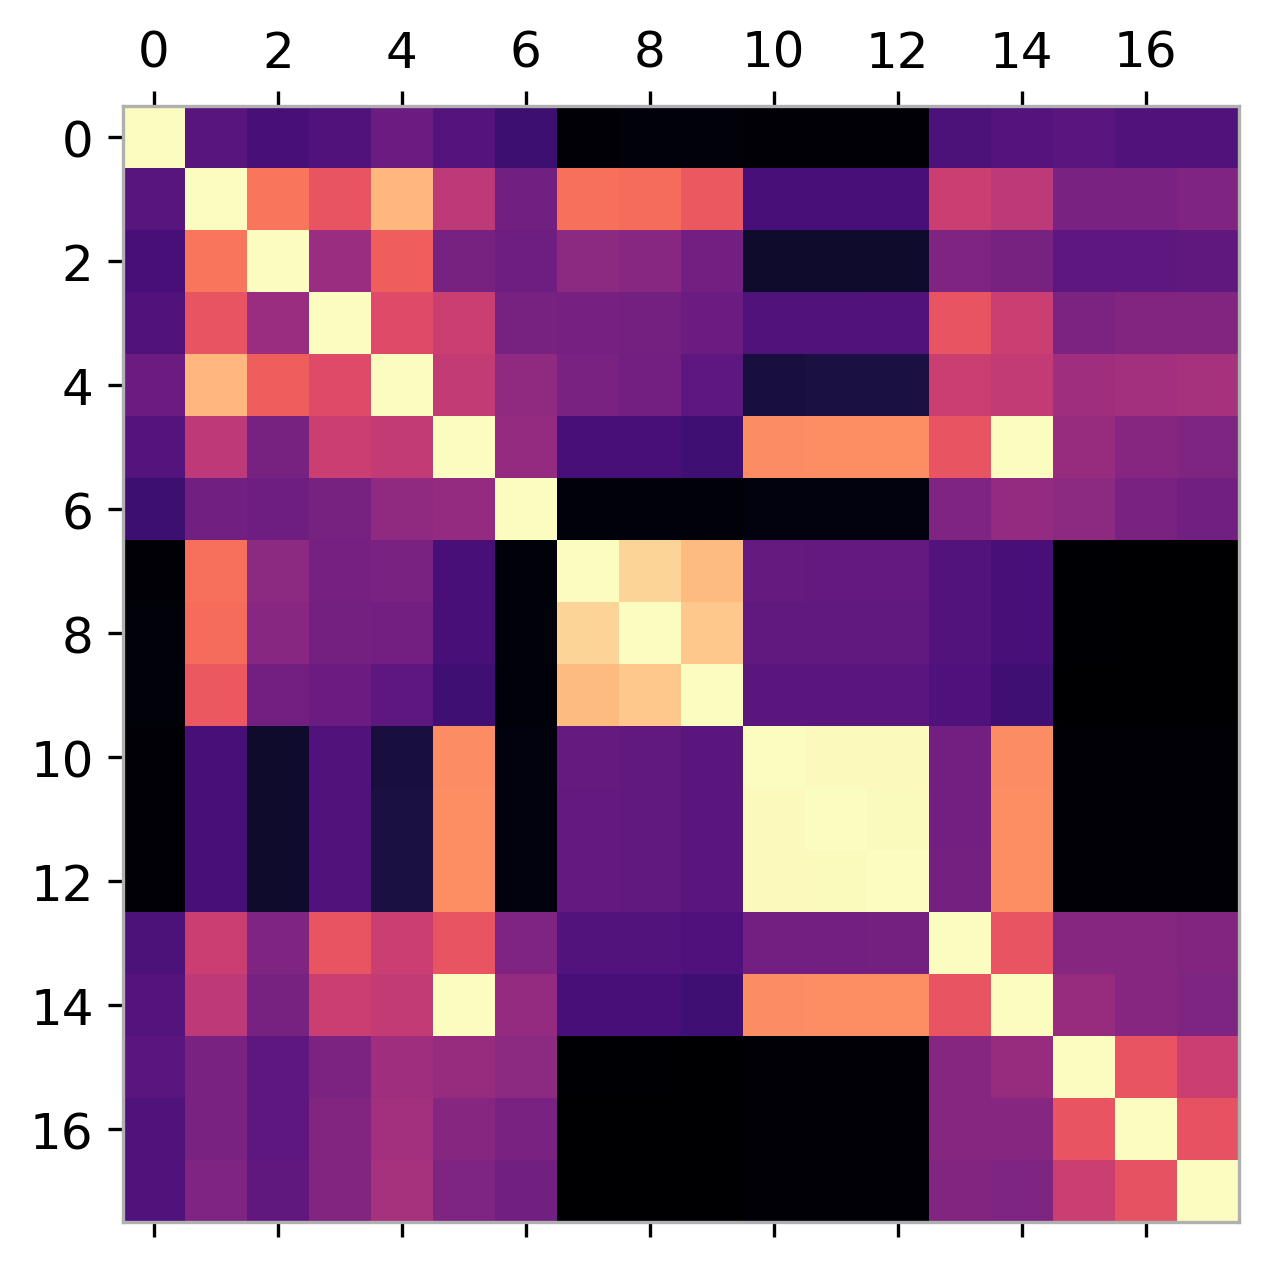

In [51]:
plt.matshow(sim)

In [25]:
proj2d  = MDS(n_components=2, dissimilarity="precomputed").fit(sim)

/home/nathan/Documents/MEG_ESN/venv/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [52]:
proj2d_nobert1  = MDS(n_components=2, dissimilarity="precomputed").fit(sim[1:, 1:])

/home/nathan/Documents/MEG_ESN/venv/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [53]:
vects_nobert1 = proj2d_nobert1.embedding_

6

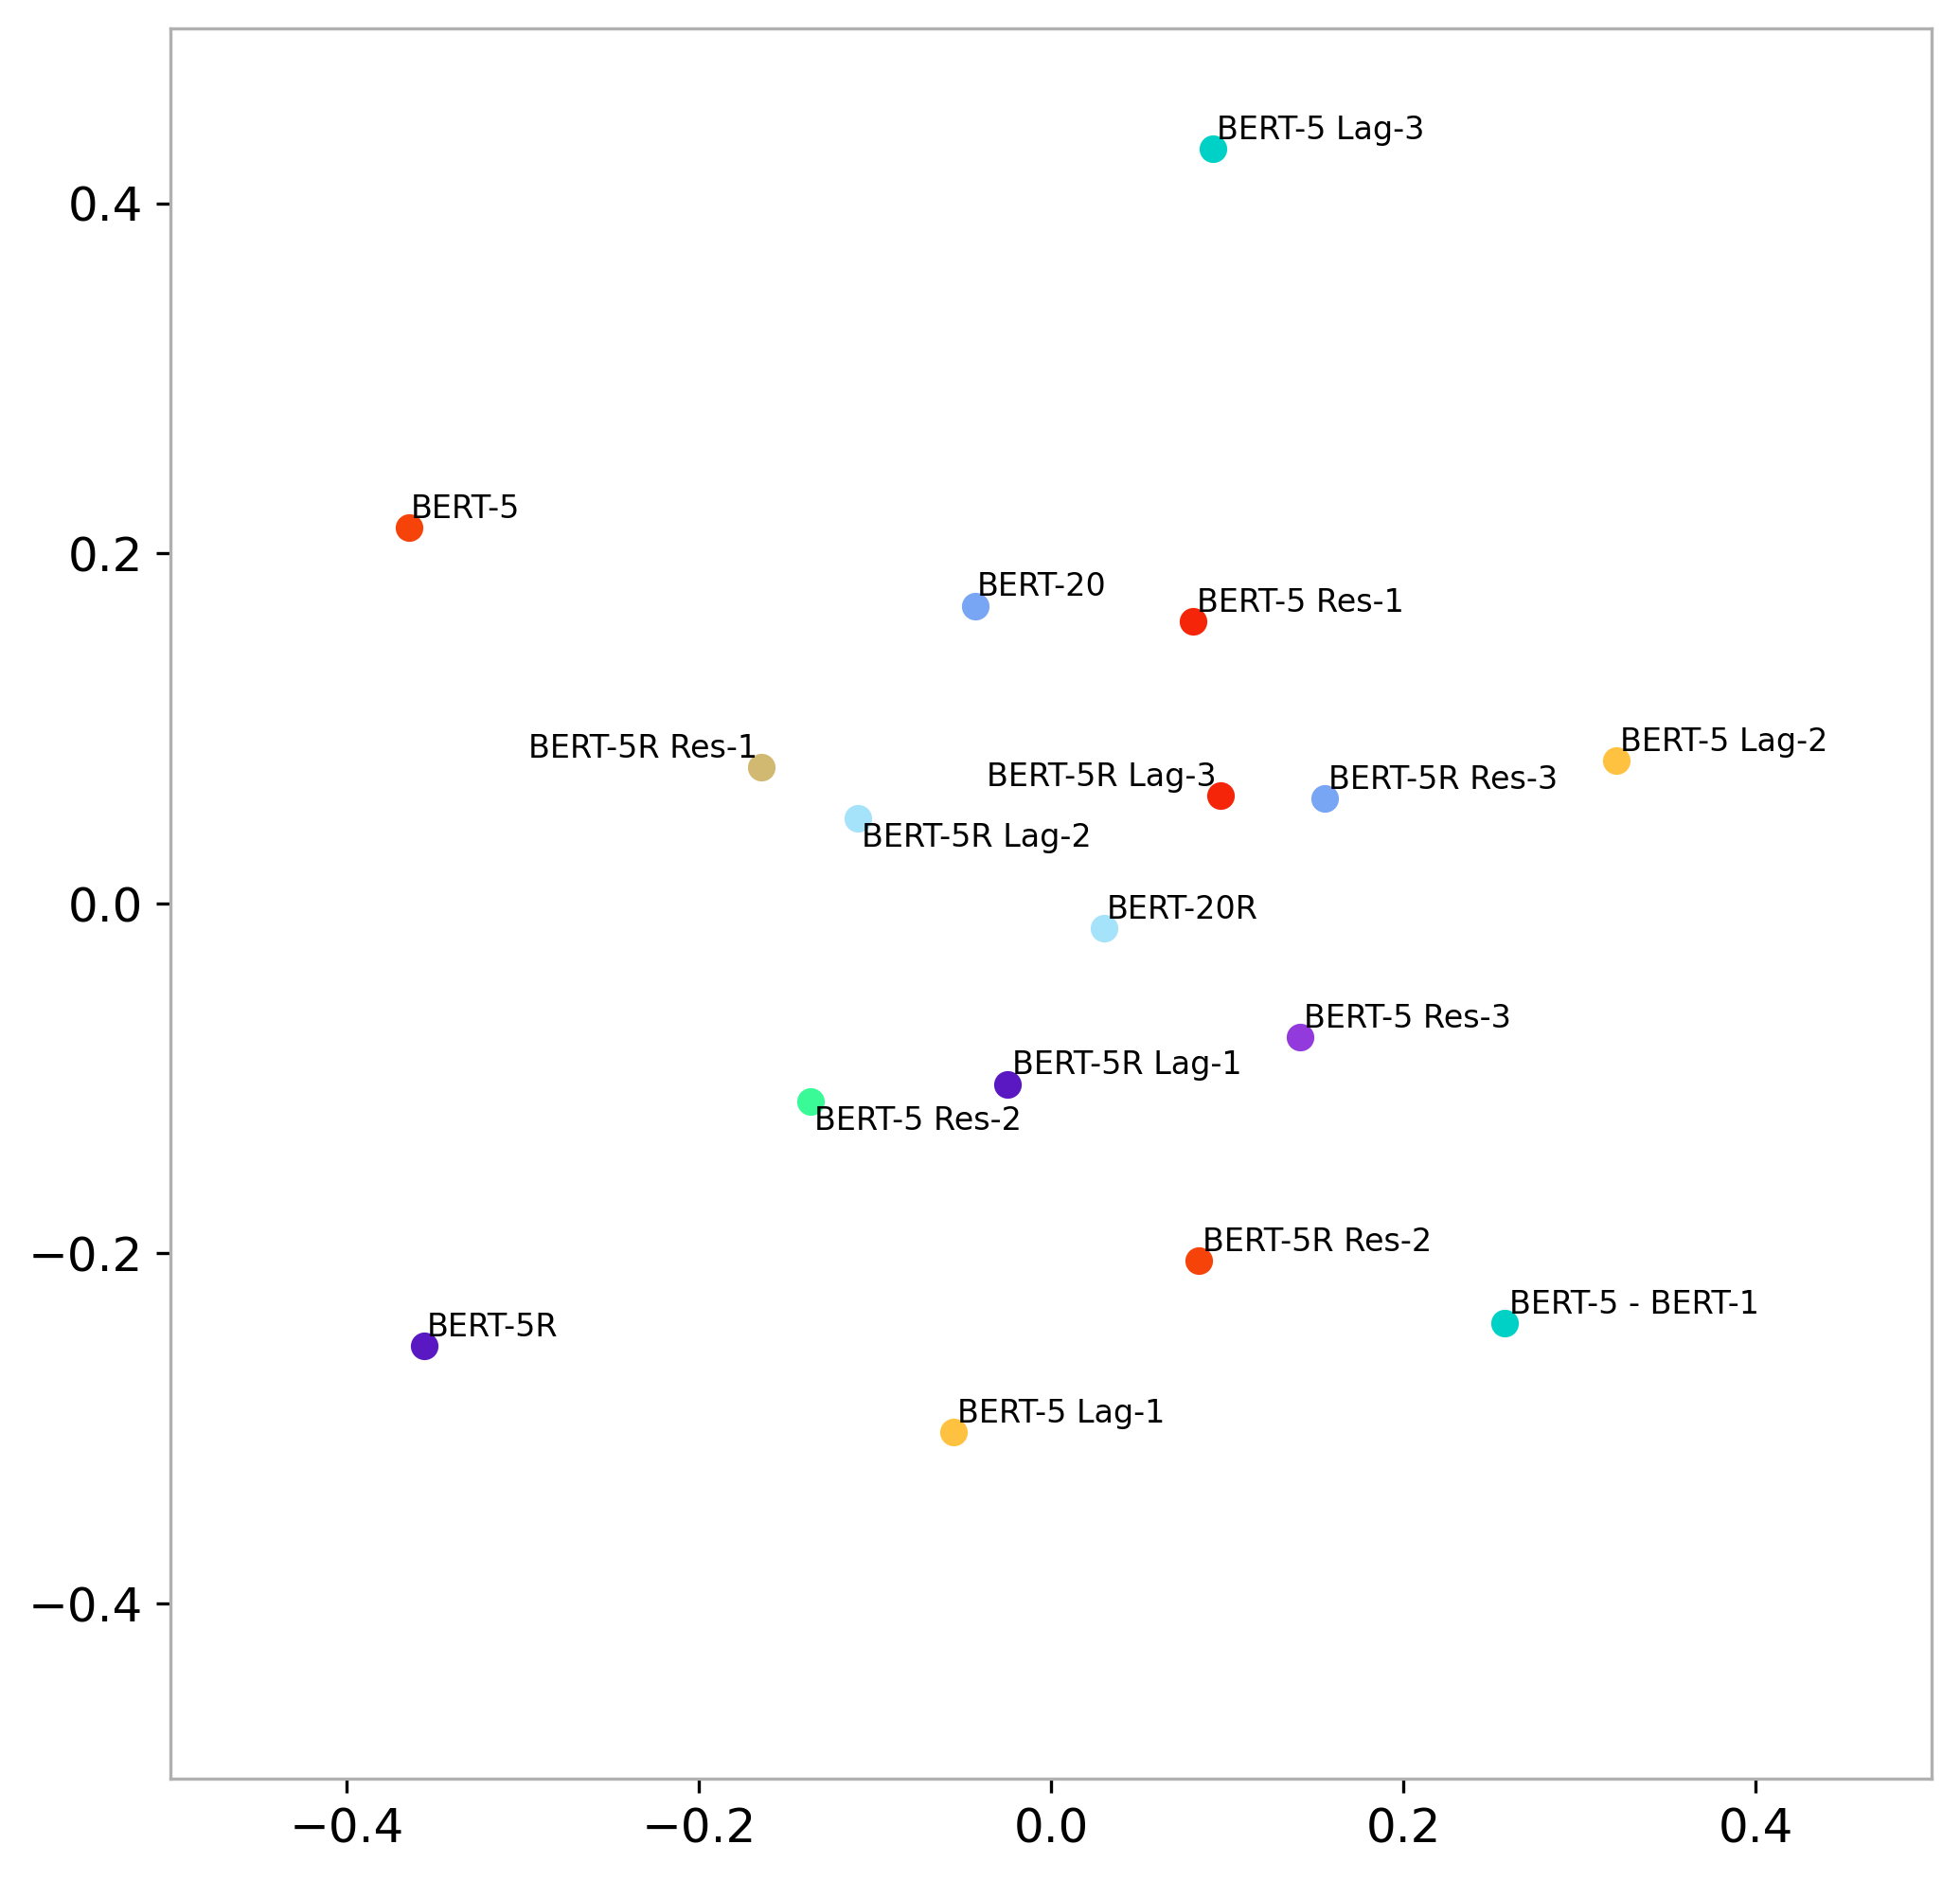

In [58]:
plt.figure(figsize=(8, 8))
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

texts = []
for i, v in enumerate(vects_nobert1):
    plt.scatter(*v)
    texts.append(plt.text(*v, indexes[i+1], size=8))
    
adjust_text(texts)

In [26]:
vects = proj2d.embedding_

60

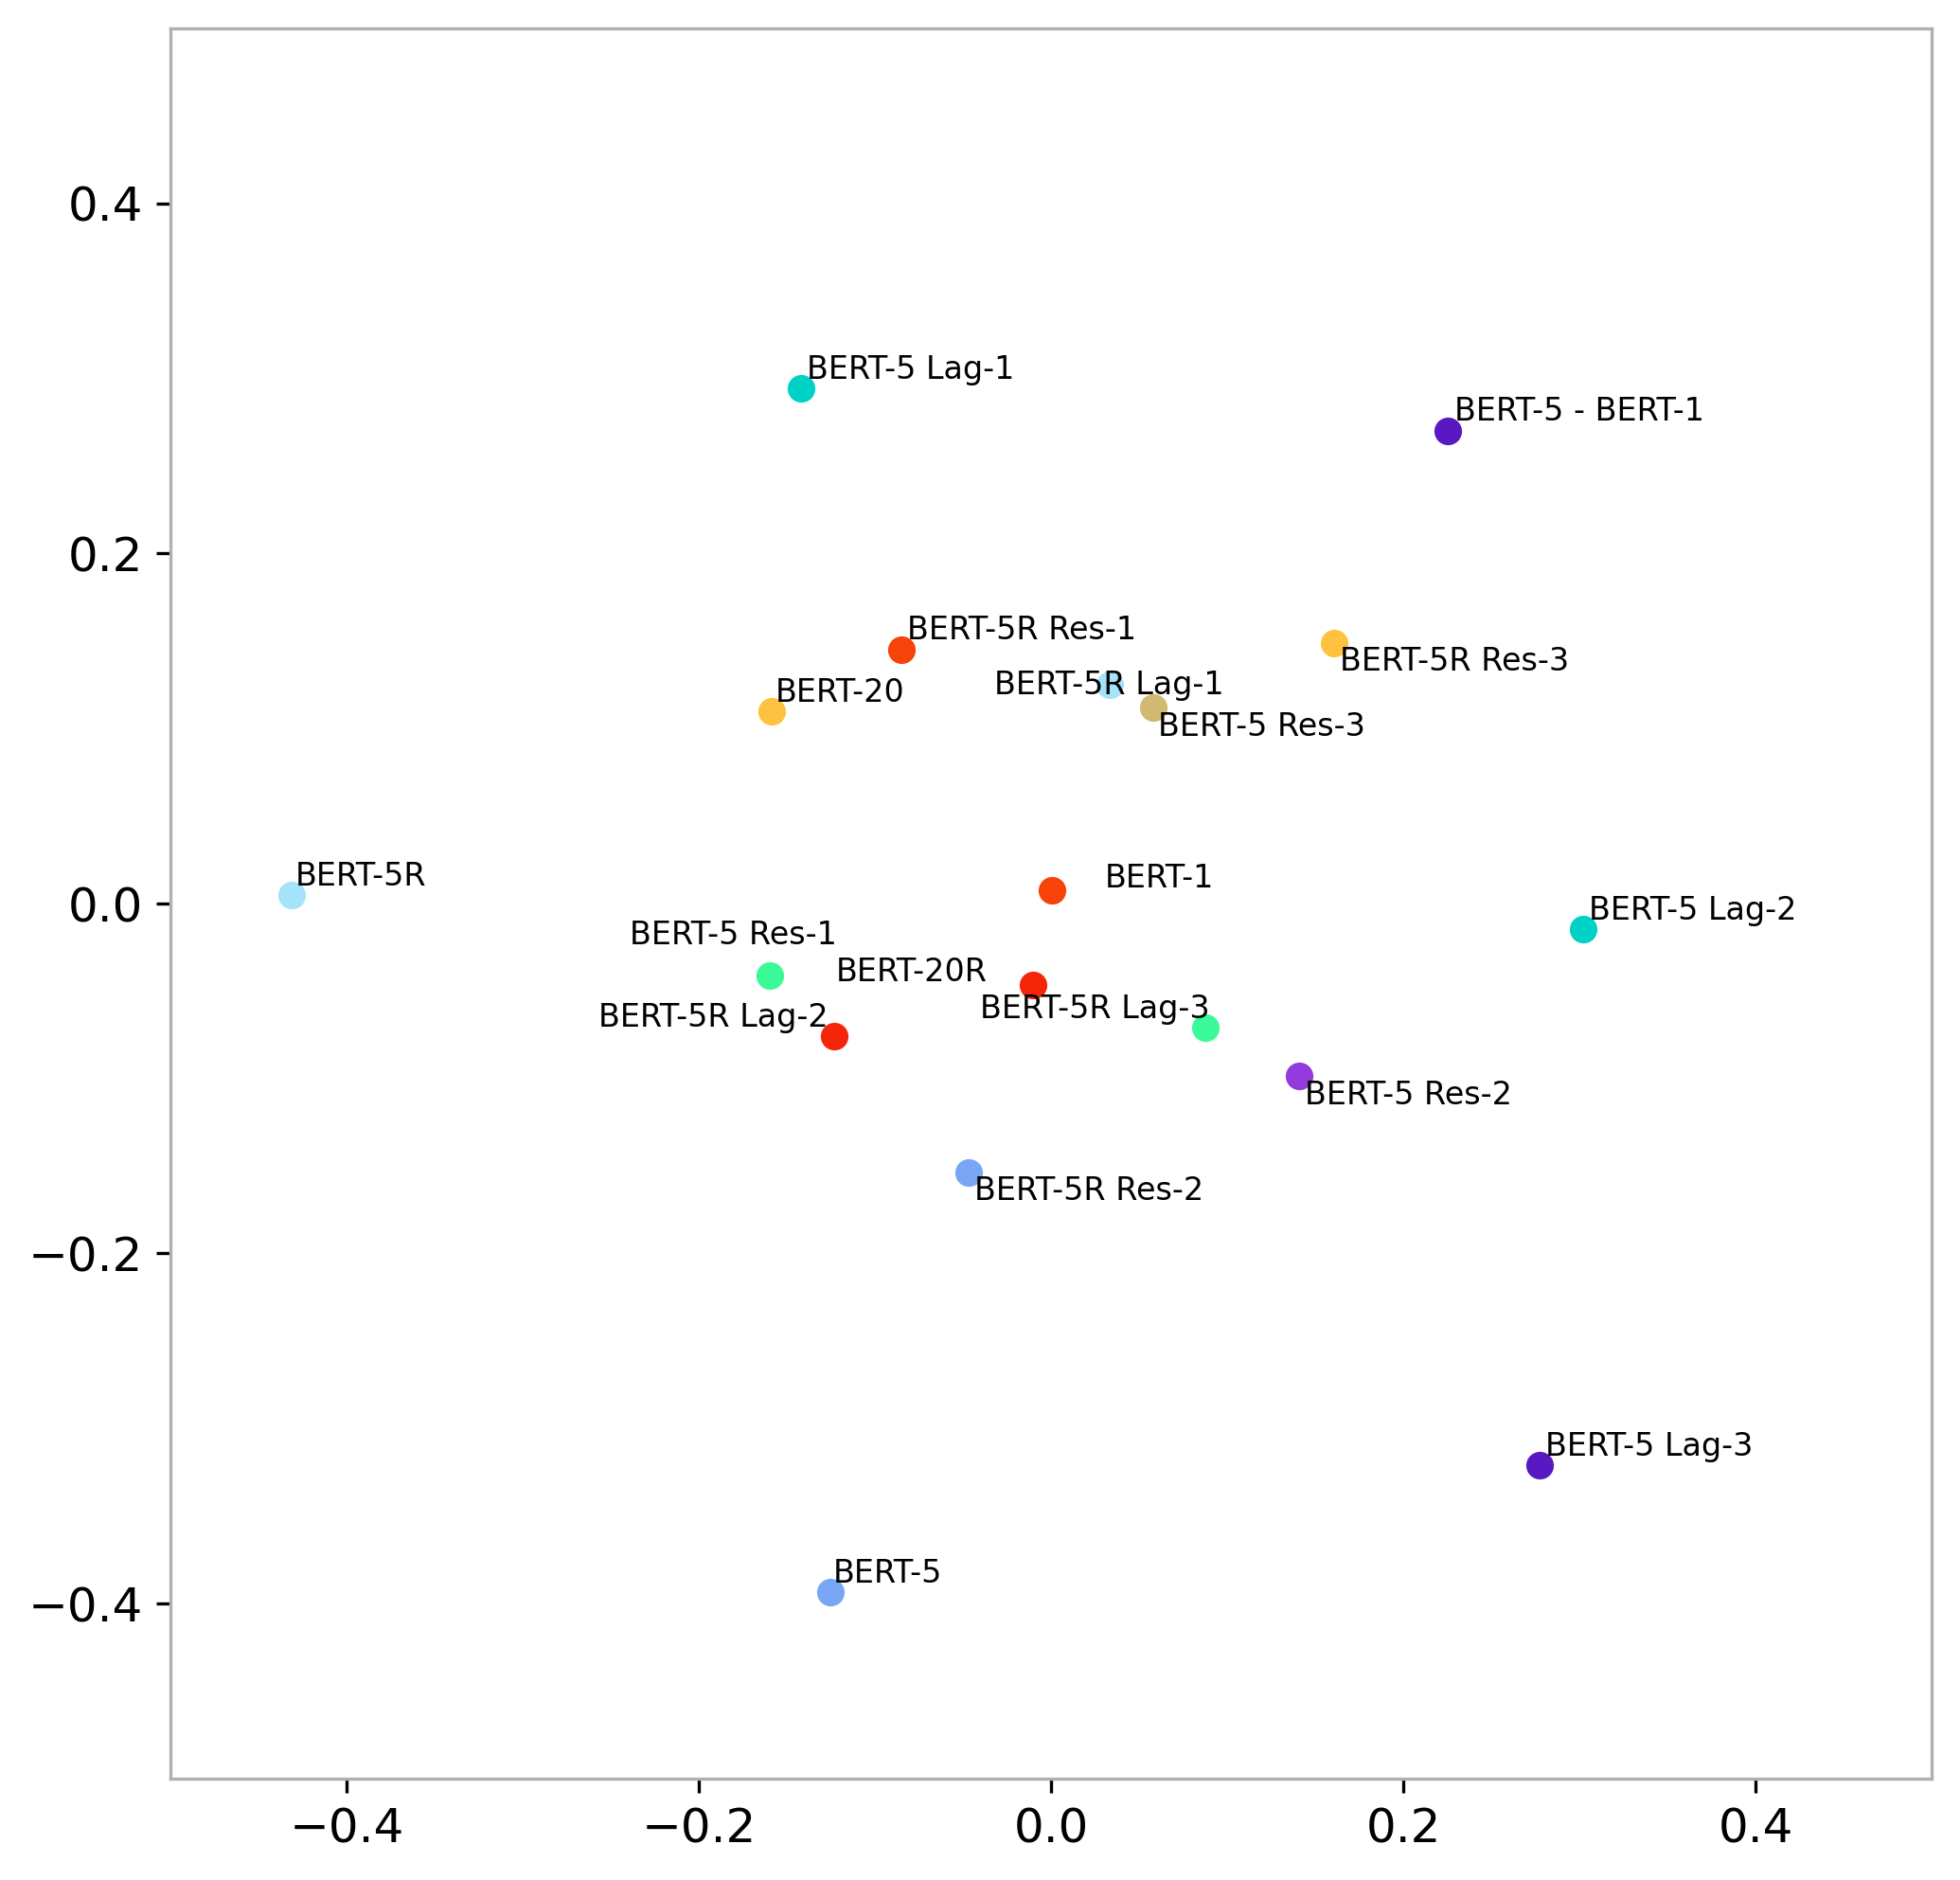

In [59]:
plt.figure(figsize=(8, 8))
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

for i, v in enumerate(vects):
    plt.scatter(*v)
    texts.append(plt.text(*v, indexes[i], size=8))
    
adjust_text(texts)

In [28]:
proj3d  = MDS(n_components=3, dissimilarity="precomputed").fit(sim)

/home/nathan/Documents/MEG_ESN/venv/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [29]:
vects3 = proj3d.embedding_

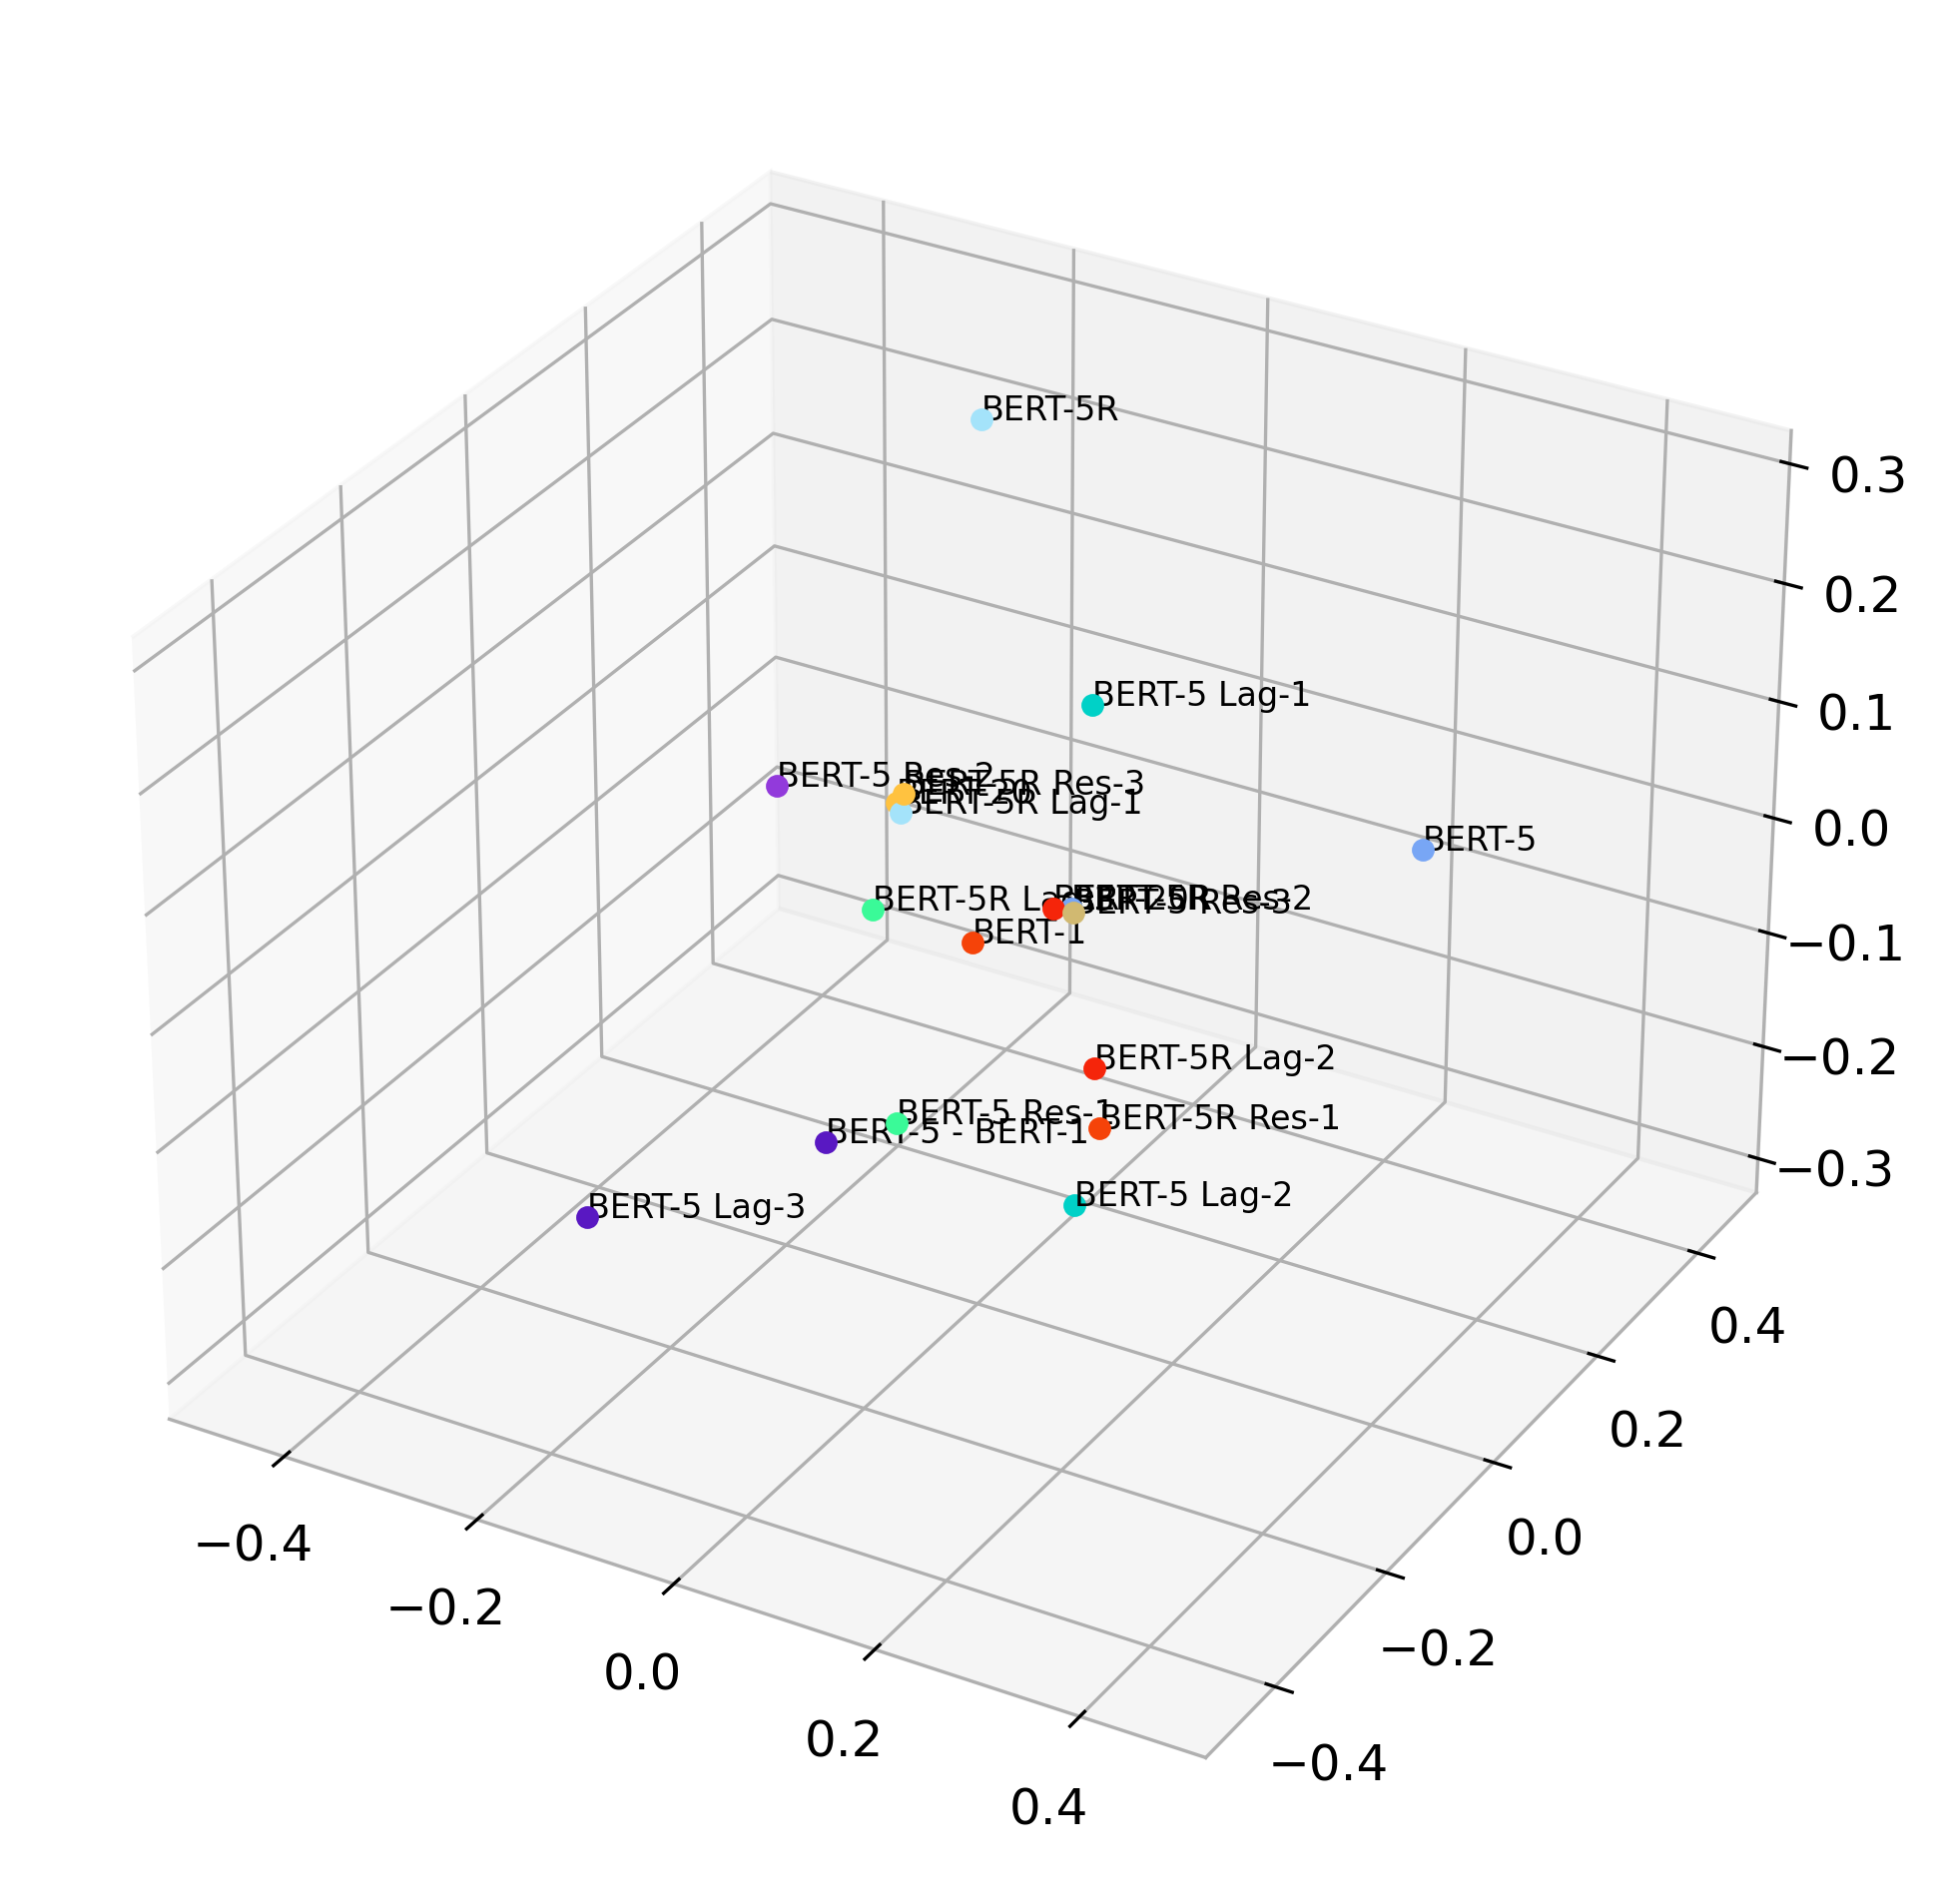

In [60]:
#from adjustText import adjust_text

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

texts = []
for i, v in enumerate(vects3):
    ax.scatter(*v)
    texts.append(ax.text(*v, indexes[i], size=8))